<a href="https://colab.research.google.com/github/salim-hbk/ai-ml/blob/main/Multi_output_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.vis_utils import plot_model
import pandas as pd


In [3]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
raw_data = pd.read_excel(URL)
raw_data = raw_data.reset_index(drop=True)
raw_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
#format the Y
def format_output(data):
  y1 = data.pop('Y1')
  y1 = np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2)
  return y1, y2

def normalize(x):
  return (x - train_stats['mean']) / train_stats['std']


In [6]:
train, test = train_test_split(raw_data, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()

train_y = format_output(train)
test_y =  format_output(test)

# Normalize training and Test data
norm_train_x = normalize(train)
norm_test_x = normalize(test)

In [7]:
input_layer = tf.keras.layers.Input(shape=(len(train.columns),))
dense_1 = tf.keras.layers.Dense(128, activation='relu')(input_layer)
dense_2 = tf.keras.layers.Dense(128, activation='relu')(dense_1)

output_1 = tf.keras.layers.Dense(1, name='y1_output')(dense_2)
dense_3 = tf.keras.layers.Dense(64, activation='relu')(dense_2)

output_2 = tf.keras.layers.Dense(1, name='y2_output')(dense_3)

model = tf.keras.models.Model(inputs=input_layer, outputs=[output_1, output_2])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

Lets visualize the model

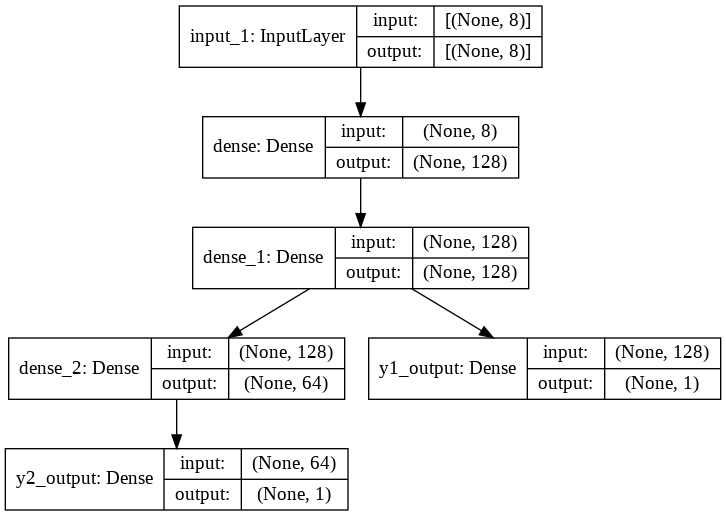

In [9]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [10]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer, loss={
    'y1_output': 'mse', 'y2_output': 'mse'
}, metrics={
    'y1_output': tf.keras.metrics.RootMeanSquaredError(), 'y2_output': tf.keras.metrics.RootMeanSquaredError()
})

In [11]:
# Train the model for 500 epochs
history = model.fit(norm_train_x, train_y,
                    epochs=500, batch_size=10, validation_data=(norm_test_x, test_y))

Epoch 1/500
62/62 [==============================] - 1s 10ms/step - loss: 556.3723 - y1_output_loss: 259.1157 - y2_output_loss: 297.2565 - y1_output_root_mean_squared_error: 15.4253 - y2_output_root_mean_squared_error: 16.4881 - val_loss: 29.9593 - val_y1_output_loss: 13.3063 - val_y2_output_loss: 16.6530 - val_y1_output_root_mean_squared_error: 3.6478 - val_y2_output_root_mean_squared_error: 4.0808
Epoch 2/500
62/62 [==============================] - 0s 2ms/step - loss: 30.1712 - y1_output_loss: 13.2816 - y2_output_loss: 16.8896 - y1_output_root_mean_squared_error: 3.6389 - y2_output_root_mean_squared_error: 4.1034 - val_loss: 35.1895 - val_y1_output_loss: 10.4527 - val_y2_output_loss: 24.7368 - val_y1_output_root_mean_squared_error: 3.2331 - val_y2_output_root_mean_squared_error: 4.9736
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 23.1790 - y1_output_loss: 8.3978 - y2_output_loss: 14.7812 - y1_output_root_mean_squared_error: 2.8899 - y2_output_root_mean_sq

In [13]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_x, y=test_y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 2ms/step - loss: 1.0101 - y1_output_loss: 0.2565 - y2_output_loss: 0.7536 - y1_output_root_mean_squared_error: 0.5065 - y2_output_root_mean_squared_error: 0.8681
Loss = 1.0101252794265747, Y1_loss = 0.2564952075481415, Y1_mse = 0.5064535737037659, Y2_loss = 0.7536300420761108, Y2_mse = 0.8681187033653259


In [15]:
def plot_diff(y_true, y_pred, title=''):
  plt.scatter(y_true, y_pred)
  plt.title(title)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([-100, 100], [-100, 100])
  plt.show()


def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0, ylim)
  plt.plot(history.history[metric_name], color='blue', label=metric_name)
  plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
  plt.show()

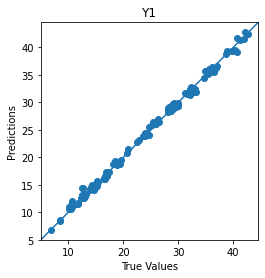

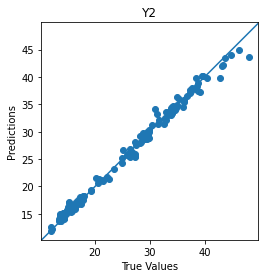

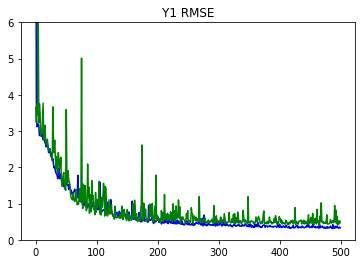

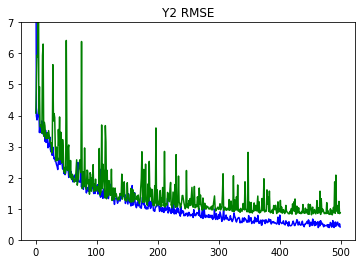

In [18]:
Y_pred= model.predict(norm_test_x)

plot_diff(test_y[0], Y_pred[0], title='Y1')
plot_diff(test_y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)